### Μέρος 2ο - Σύστημα Εντοπισμού Τηλεφωνικών Τόνων (Telephone Touch – Tones)

***Ερώτημα 2.1:*** Για να δημιουργήσουμε τους 10 διαφορετικούς τόνους, θα ορίσουμε κάθε τόνο ως άθροισμα δύο ημιτονοειδών κυμάτων με τις αντίστοιχες συχνότητες με βάση τον πίνακα που δίνεται. Θα χρησιμοποιήσουμε ρυθμό δειγματοληψίας 8192 Hz και κάθε τόνος θα έχει μήκος 1000 δειγμάτων.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Audio

# Define the sampling rate and tone length
fs = 8192
length = 1000

# Define the frequencies for each tone
frequencies = {
    '1': (697, 1209),
    '2': (697, 1336),
    '3': (697, 1477),
    '4': (770, 1209),
    '5': (770, 1336),
    '6': (770, 1477),
    '7': (852, 1209),
    '8': (852, 1336),
    '9': (852, 1477),
    '0': (941, 1336)
}

# Generate and plot each tone
for key in frequencies:
    f1, f2 = frequencies[key]
    tone = np.sin(2*np.pi*f1*np.arange(length)/fs) + np.sin(2*np.pi*f2*np.arange(length)/fs)
    #plt.plot(tone)
    #plt.title(f'Tone for {key}')
    #plt.xlabel('Time (samples)')
    #plt.ylabel('Amplitude')
    #plt.show()
    
    # Play the tone
    #display(Audio(tone, rate=fs, autoplay=True))


Αν βγάλουμε από τα σχόλια τον κώδικα, μπορούμε να ακούσουμε τον τόνο του κάθε αριθμού και να τους σχεδιάσουμε.

***Ερώτημα 2.2:*** Παρακάτω είναι κώδικας Python που υπολογίζει το DFT των σημάτων d1[n], d4[n] και d8[n] και σχεδιάζει τα φάσματα τους:

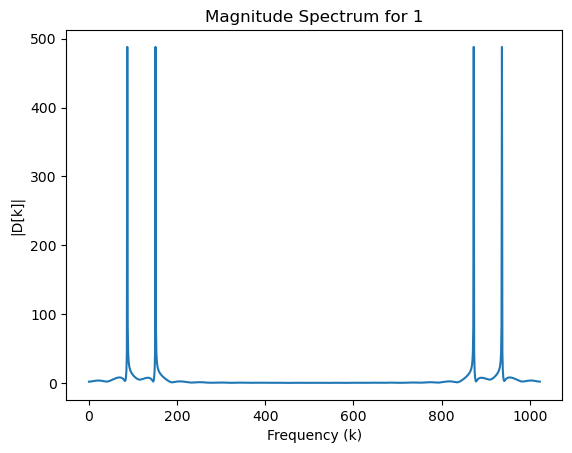

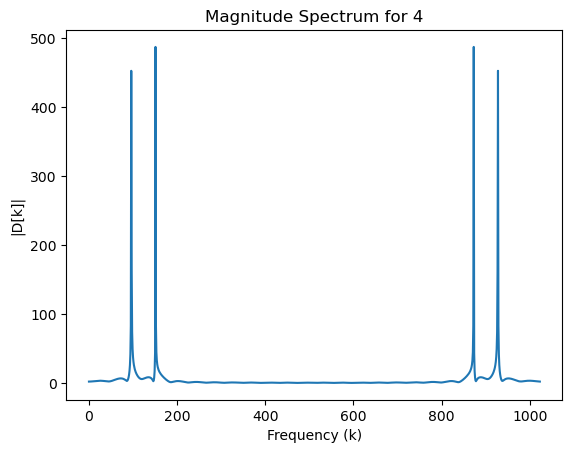

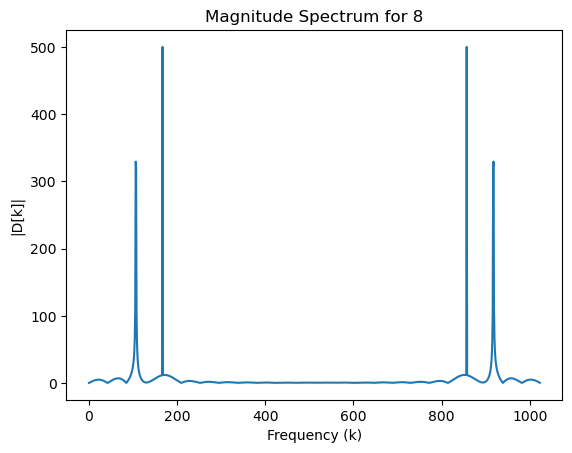

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Audio

# Define the sampling rate and tone length
fs = 8192
length = 1000

# Define the frequencies for each tone
frequencies = {
    '1': (697, 1209),
    '4': (770, 1209),
    '8': (852, 1336),
}

# Generate and plot each tone
for key in frequencies:
    f1, f2 = frequencies[key]
    tone = np.sin(2*np.pi*f1*np.arange(length)/fs) + np.sin(2*np.pi*f2*np.arange(length)/fs)
    
    # Calculate the DFT
    N = 1024
    X = np.fft.fft(tone, N)
    magX = np.abs(X)

    # Plot the magnitude spectrum
    k = np.arange(N)
    plt.plot(k, magX)
    plt.title(f'Magnitude Spectrum for {key}')
    plt.xlabel('Frequency (k)')
    plt.ylabel('|D[k]|')
    plt.show()


***Ερώτημα 2.3:*** Δημιουργούμε και αποθηκεύουμε σε αρχείο “tone sequence.wav” ένα σήμα με διαδοχικούς τηλεφωνικούς τόνους ‘μεταφράζοντας’ το άθροισμα των αριθμών μητρώου μας.
AM1 = 03120015 και AM2 = 03120164 τότε τα ζητούμενα ψηφία είναι:0 6 2 4 0 1 7 9 (= 03120015 + 03120164)

In [10]:
import numpy as np
from scipy.io import wavfile
from IPython.display import display, Audio
import soundfile as sf

# Define the register numbers of the group members
am1 = '03120015'
am2 = '03120164'

# Add leading zero to the sum of the register numbers
sum_register = str(sum(map(int, (am1, am2)))).zfill(8)  

# map(int, (am1, am2)): This creates an iterator that applies the int function to each element in a tuple containing am1 and am2. This effectively converts the register numbers from strings to integers.
# sum(map(int, (am1, am2))): This computes the sum of the two integers
# str(sum(map(int, (am1, am2)))): This converts the sum to a string.
#.zfill(8): This pads the string with zeros on the left until it is 8 characters long. 

# Get the digits from the sum of the register numbers
digits = [int(d) for d in sum_register]

#extracts the individual digits from the string sum_register and stores them as a list of integers in digits.

# Define the frequencies for each digit
frequencies = {
    0: (941, 1336),
    1: (697, 1209),
    2: (697, 1336),
    3: (697, 1477),
    4: (770, 1209),
    5: (770, 1336),
    6: (770, 1477),
    7: (852, 1209),
    8: (852, 1336),
    9: (852, 1477)
}

# Define the sampling rate and tone length
fs = 8192
length = 1000 #tone length is set to 1000 samples
silence_length = 100

# Generate the tones and concatenate them with silence
tones = np.zeros((len(digits) * length + (len(digits) - 1) * silence_length))
#we initialize an array to hold the audio signal. The array is initialized with zeros and has a length equal to the total number of samples needed to represent all the tones and silences in the sequence of digits.
for i, digit in enumerate(digits):
    f1, f2 = frequencies[digit]
    tone = np.sin(2*np.pi*f1*np.arange(length)/fs) + np.sin(2*np.pi*f2*np.arange(length)/fs)
    #the formula generates two sine waves with the specified frequencies and adds them together to create a composite waveform. The resulting tone is stored in the 'tone' array.
    tones[i*(length+silence_length):(i+1)*length+i*silence_length] = tone 
    #Insert the tone into the tones array at the appropriate location, taking into account the length of the tone and the silence. 
    if i != len(digits) - 1:
        tones[(i+1)*length+i*silence_length:(i+1)*(length+silence_length)] = np.zeros((silence_length)) 
        #If the current digit is not the last one in the sequence, insert a silence into the tones array after the current tone. 

# Write the audio file
sf.write('tone_sequence.wav', tones, fs)

# Display and play the audio
display(Audio(tones, rate=fs, autoplay=True))

# Print the digits
print(digits)



OSError: cannot load library 'libsndfile.dll': error 0x7e

Σε αυτόν τον κώδικα, έχουμε βάλει σε σχόλια την αναπαραγωγή του αρχείου, και εκτυπώνουμε τα ψηφία του αθροίσματος του αριθμού μητρώου, για να βεβαιωθούμε ότι υπάρχει και το αρχικό μηδενικό, καθώς με μια απλή πρόσθεση τα ψηφία θα ήταν [6, 2, 4, 0, 1, 7, 9] και όχι 
[0, 6, 2, 4, 0, 1, 7, 9].

***Ερώτημα 2.4:*** Χρησιμοποιώντας την συνάρτηση fft της numpy και κατάλληλα χρονικά παράθυρα, (i) τετραγωνικά και (ii) Hamming, υπολογίζουμε τον μετασχηματισμό Fourier του παραπάνω σήματος και τα σχεδιάζουμε ξεχωριστά αλλά και όλα μαζί.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Define the register numbers of the group members
am1 = '03120015'
am2 = '03120164'

# Add leading zero to the sum of the register numbers
sum_register = str(sum(map(int, (am1, am2)))).zfill(8)

# Get the digits from the sum of the register numbers
digits = [int(d) for d in sum_register]

# Define the frequencies for each digit
frequencies = {
    0: (941, 1336),
    1: (697, 1209),
    2: (697, 1336),
    3: (697, 1477),
    4: (770, 1209),
    5: (770, 1336),
    6: (770, 1477),
    7: (852, 1209),
    8: (852, 1336),
    9: (852, 1477)
}

# Define the sampling rate and tone length
fs = 8192
length = 1000
silence_length = 100

# Generate the tones and concatenate them with silence
tones = np.zeros((len(digits) * length + (len(digits) - 1) * silence_length))
for i, digit in enumerate(digits):
    f1, f2 = frequencies[digit]
    tone = np.sin(2*np.pi*f1*np.arange(length)/fs) + np.sin(2*np.pi*f2*np.arange(length)/fs)
    tones[i*(length+silence_length):(i+1)*length+i*silence_length] = tone
    if i != len(digits) - 1:
        tones[(i+1)*length+i*silence_length:(i+1)*(length+silence_length)] = np.zeros((silence_length))

# Define the windows
L = 1000
N = 1024
w1 = np.linspace(0, L-1, L)
quadratic_window = -(w1 - L/2)**2 + (L/2)**2 #This defines a quadratic window function that is centered at L/2.
hamming_window = 0.54 - 0.46 * np.cos(2*np.pi*w1 / (L-1)) #This defines a Hamming window function

# Apply the windows to the tones and calculate the DFTs
X_quadratic = []
X_hamming = []

#these create empty lists that will be used to store the DFTs of the windowed sequences.

for i, digit in enumerate(digits):
    start = i * (length + silence_length)
    end = start + length    #These define the starting and ending indices of the current tone in the tones sequence.
    tone = tones[start:end]  #This extracts the current tone from the tones sequence

    # Apply the quadratic window
    tone_quadratic = tone * quadratic_window
    X_quadratic.append(np.fft.fft(tone_quadratic, N))

    # Apply the Hamming window
    tone_hamming = tone * hamming_window
    X_hamming.append(np.fft.fft(tone_hamming, N))

# Plot the DFTs
# Define the colors for each digit
colors = {
    0: 'red',
    1: 'blue',
    2: 'yellow',
    3: 'purple',
    4: 'green',
    5: 'teal',
    6: 'orange',
    7: 'pink',
    8: 'brown',
    9: 'black'
}

# Plot the quadratic windowed DFTs
fig_quad, ax_quad = plt.subplots(1, 1, figsize=(8, 5))
for i in range(len(digits)):
    X_quadratic_mag = np.abs(X_quadratic[i])
    k = np.arange(N)
    ax_quad.plot(k * fs / N, X_quadratic_mag, color=colors[digits[i]], label=f'Digit {digits[i]}')
ax_quad.set_title('Quadratic Windowed DFTs')
ax_quad.set_xlabel('Frequency (Hz)')
ax_quad.set_ylabel('|X[k]|')
ax_quad.legend()
plt.show()

# Plot the Hamming windowed DFTs
fig_hamming, ax_hamming = plt.subplots(1, 1, figsize=(8, 5))
for i in range(len(digits)):
    X_hamming_mag = np.abs(X_hamming[i])
    k = np.arange(N)
    ax_hamming.plot(k * fs / N, X_hamming_mag, color=colors[digits[i]], label=f'Digit {digits[i]}')
ax_hamming.set_title('Hamming Windowed DFTs')
ax_hamming.set_xlabel('Frequency (Hz)')
ax_hamming.set_ylabel('|X[k]|')
ax_hamming.legend()
plt.show()

for i in range(len(digits)):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the quadratic windowed DFTs
    ax_quad = axs[0]
    X_quadratic_mag = np.abs(X_quadratic[i])
    k = np.arange(N)
    ax_quad.plot(k * fs / N, X_quadratic_mag, color=colors[digits[i]])
    ax_quad.set_title(f'Digit {digits[i]} - Quadratic Window')
    ax_quad.set_xlabel('Frequency (Hz)')
    ax_quad.set_ylabel('|X[k]|')

    # Plot the Hamming windowed DFTs
    ax_hamming = axs[1]
    X_hamming_mag = np.abs(X_hamming[i])
    ax_hamming.plot(k * fs / N, X_hamming_mag, color=colors[digits[i]])
    ax_hamming.set_title(f'Digit {digits[i]} - Hamming Window')
    ax_hamming.set_xlabel('Frequency (Hz)')
    ax_hamming.set_ylabel('|X[k]|')

    plt.tight_layout()
    plt.show()



***Ερώτημα 2.5:*** Θα δημιουργήσουμε εκ νέου μια λίστα που αντιστοιχίζει κάθε πλήκτρο στη χαμηλή και την υψηλή συχνότητά του. Για να βρούμε τους δείκτες k των touch-tone συχνοτήτων, πρέπει να υπολογίσουμε το k[i] (όπου i = 0, 1, ... , 9) κάθε πλήκτρου, τιμή η οποία δίνεται από τον τύπο k = ωΝ/2π.

In [4]:
import numpy as np

N = 1000

# Define the frequencies for each digit
frequencies = {
    0: (941, 1336),
    1: (697, 1209),
    2: (697, 1336),
    3: (697, 1477),
    4: (770, 1209),
    5: (770, 1336),
    6: (770, 1477),
    7: (852, 1209),
    8: (852, 1336),
    9: (852, 1477)
}

#Lists for value of k and associating each value to its respective frequencies
value_k = []
k_list = []

for i in frequencies :
    k = [0, 0] #a list of 2 items is created
    #calculation of each element
    k[0] = int(np.array(frequencies[i][0])*N/(2*np.pi))
    k[1] = int(np.array(frequencies[i][1])*N/(2*np.pi))
    value_k.append(k)
    if k[0] not in k_list and k[1] not in k_list :
        k_list.append(k[0])
        k_list.append(k[1])
    elif k[0] in k_list and k[1] not in k_list :
        k_list.append(k[1])
    elif k[0] not in k_list and k[1] in k_list :
        k_list.append(k[0])

#Print the values of k corresponding to each frequency 
print(value_k) 
#Print the list of all k values, sorted
print(sorted(k_list))

[[149764, 212631], [110930, 192418], [110930, 212631], [110930, 235071], [122549, 192418], [122549, 212631], [122549, 235071], [135600, 192418], [135600, 212631], [135600, 235071]]
[110930, 122549, 135600, 149764, 192418, 212631, 235071]


***Ερώτημα 2.6:*** Σε μεγάλο βαθμό, η συνάρτηση ttdecode υλοποιεί την αντίστροφη διαδικασία του Ερωτήματος 3.

In [13]:
import os
import numpy as np
from scipy.fft import fft
from scipy.signal import argrelmax
from scipy.io import wavfile

def ttdecode(SignIn):
    N = 1000
    
    # Map of frequencies
    frequencies = {
        0: (0.7217,1.0247),
        1: (0.5346,0.9273),
        2: (0.5346,1.0247),
        3: (0.5346,1.1328),
        4: (0.5906,0.9273),
        5: (0.5906,1.0247),
        6: (0.5906,1.1328),
        7: (0.6535,0.9273),
        8: (0.6535,1.0247),
        9: (0.6535,1.1328)
    }
    
    # Lists for value of k and associating each value to its respective frequencies
    value_k = []

    for i in frequencies :
        k = [0, 0] # a list of 2 items is created
        # Calculation of each element
        k[0] = int(np.round((np.array(frequencies[i][0])*N)/(2*np.pi)))
        k[1] = int(np.round((np.array(frequencies[i][1])*N)/(2*np.pi)))
        value_k.append(sorted(k))

    # Add zero padding to the end of the signal
    padding_length = (1000 - len(SignIn) % 1000) % 1000
    SignIn = np.pad(SignIn, (0, 1000), 'constant', constant_values=(0, 0))

    Vector = []
    shift = 0
    for i in range(0, len(SignIn) - 1000, 1000):
        while i + shift < len(SignIn) and abs(SignIn[i + shift]) < 0.1:
            shift += 5
        if i + shift == len(SignIn - 5):
            shift += 5
            break
        shift -= 5
        
        dft = np.fft.fft(SignIn[i + shift:i + 1000 + shift])

        energy = np.round(abs(dft)**2)
        
        max_energies = [max(energy[energy!=max(energy)]), max(energy)]
        energies_list = list(energy)
        index_0 = energies_list.index(max_energies[0]) 
        index_1 = energies_list.index(max_energies[1]) 
        search_indices = [index_0, index_1]
        search_indices = sorted(search_indices)
        for i in range(10):
            if search_indices == value_k[i]:
                Vector.append(i)
           
    return Vector

# Get current working directory
cwd = os.getcwd()
#print(cwd)
# Join path to file
file_path = os.path.join(cwd, 'tone_sequence.wav')
# Load the file
samplerate, signal = wavfile.read(file_path)
print(ttdecode(signal))

[0, 6, 2, 4, 0, 1, 7, 9]


***Ερώτημα 2.7***

In [14]:
import os
import numpy as np
from scipy.fft import fft
from scipy.signal import argrelmax
from scipy.io import wavfile

def ttdecode(file_path):
    # Load data from .npy file
    SignIn = np.load(file_path, allow_pickle=True)
    
    N = 1000
    
    # Map of frequencies
    frequencies = {
        0: (0.7217,1.0247),
        1: (0.5346,0.9273),
        2: (0.5346,1.0247),
        3: (0.5346,1.1328),
        4: (0.5906,0.9273),
        5: (0.5906,1.0247),
        6: (0.5906,1.1328),
        7: (0.6535,0.9273),
        8: (0.6535,1.0247),
        9: (0.6535,1.1328)
    }
    
    # Lists for value of k and associating each value to its respective frequencies
    value_k = []

    for i in frequencies :
        k = [0, 0] # a list of 2 items is created
        # Calculation of each element
        k[0] = int(np.round((np.array(frequencies[i][0])*N)/(2*np.pi)))
        k[1] = int(np.round((np.array(frequencies[i][1])*N)/(2*np.pi)))
        value_k.append(sorted(k))

    # Add zero padding to the end of the signal
    padding_length = (1000 - len(SignIn) % 1000) % 1000
    SignIn = np.pad(SignIn, (0, 1000), 'constant', constant_values=(0, 0))

    Vector = []
    shift = 0
    for i in range(0, len(SignIn) - 1000, 1000):
        while i + shift < len(SignIn) and abs(SignIn[i + shift]) < 0.1:
            shift += 5
        if i + shift == len(SignIn - 5):
            shift += 5
            break
        shift -= 5
        
        dft = np.fft.fft(SignIn[i + shift:i + 1000 + shift])

        energy = np.round(abs(dft)**2)
        
        max_energies = [max(energy[energy!=max(energy)]), max(energy)]
        energies_list = list(energy)
        index_0 = energies_list.index(max_energies[0]) 
        index_1 = energies_list.index(max_energies[1]) 
        search_indices = [index_0, index_1]
        search_indices = sorted(search_indices)
        for i in range(10):
            if search_indices == value_k[i]:
                Vector.append(i)
           
    return Vector

# Get current working directory
cwd = os.getcwd()
# Join path to file
easy = os.path.join(cwd, 'easy_sig.npy')
medium = os.path.join(cwd, 'medium_sig.npy')
hard = os.path.join(cwd, 'hard_sig.npy')
print(ttdecode(easy))
print(ttdecode(medium))
print(ttdecode(hard))

[3, 1, 4, 0, 4, 8, 1, 5]
[3, 2, 4, 8, 8, 2, 1, 0, 9, 6]
[2, 0, 4, 4, 9, 6, 3, 7, 6, 4]
